In [17]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()

In [18]:
# define membership functions
def trapMem(x, params):
    mem = []
    a,b,c,d = np.r_[params]
    for val in x:
        if (a != b):
            term1 = (val - a) / (b - a)
        else:
            term1 = 1
        if (c != d):
            term2 = (d - val) / (d - c)
        else: 
            term2 = 1
        if (a - 0.00001 <= val <= d + 0.00001):
            value = max(min(term1, term2, 1), 0)
        else:
            value = 0
        mem.append(value)
        # print(val, value)
    return mem

def gaussMem(x, params):
    mem = []
    sigma, c = np.r_[params]
    for val in x:
        term1 = -1 * ((val - c) ** 2)
        term2 = 2 * (sigma ** 2)
        value = np.e ** (term1 / term2)
        mem.append(value)
        # print(val, value)
    return mem

def trigMem(x, params):
    mem = []
    a,b,c = np.r_[params]
    for val in x:
        if (a != b):
            term1 = (val - a) / (b - a)
        else:
            term1 = 1
        if (b != c):
            term2 = (c - val) / (c - b)
        else:
            term2 = 1
        if(val < a - 0.00001 or val > c + 0.00001):
            value = 0
        else:
            value = max(min(term1,term2), 0)
        mem.append(value)
        # print(val, value)
    return mem

def centroidDF(x, mf):
    sum = np.sum(mf)
    mfSum = np.sum(np.multiply(mf, x))
    return mfSum / sum

def imp_zadeh(x,y):
    return np.fmin( 1.0 , 1.0 - x + y )

def imp_cor_min(x,y):
    return np.fmin( x, y )

def imp_cor_prod(x,y):
    return np.multiply(x, y)

def implication(x,y,type):
    if (type == 0):
        return np.fmin(1.0, 1.0 - x + y)
    elif (type == 1):
        return np.fmin(x, y)
    elif (type == 2):
        return np.multiply(x, y)

# interpret membership
def interpMem(values, memFunc, x):
    lIndex = None
    for i in range(len(values)):
        if values[i] > x:
            lIndex = i - 1
            break
    
    if lIndex is None: #if the index is at the end of the array
        lIndex = len(values) - 2 # set to the second to last index 

    left = memFunc[lIndex]
    right = memFunc[lIndex + 1]

    leftWeight = (values[lIndex + 1] - x) / (values[lIndex + 1] - values[lIndex])
    rightWeight = 1 - leftWeight

    return (leftWeight * left) + (rightWeight * right)
    
def aggregate(rules, type):
    if (type == 0):
        return np.fmax.reduce(rules)
    if (type == 1):
        return sum(rules)

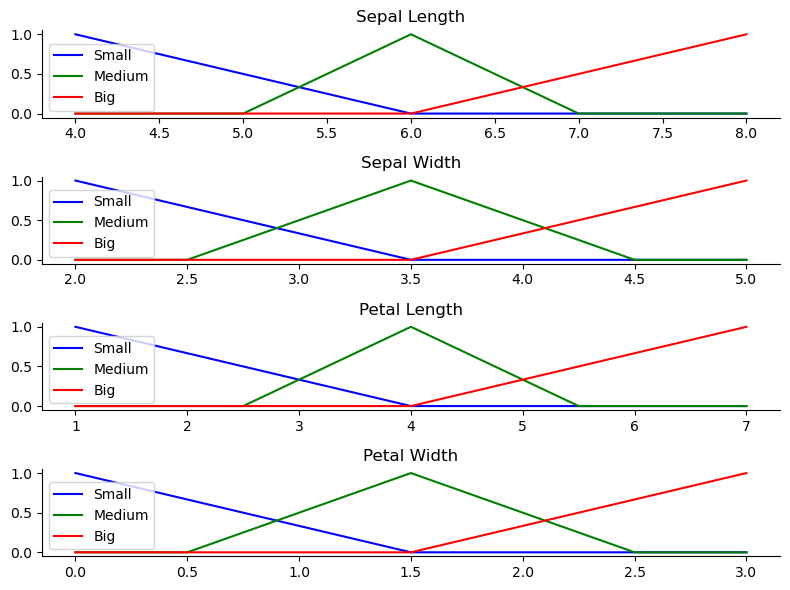

In [19]:
# fuzzy membership functions
x_sl = np.arange(4, 8.1, .1)
x_sw = np.arange(2, 5.1, .1)
x_pl = np.arange(1, 7.1, .1)
x_pw = np.arange(0, 3.1, .1)

# print(x_sl)

sl_lo = trigMem(x_sl, [4, 4, 6])
sl_md = trigMem(x_sl, [5, 6, 7])
sl_hi = trigMem(x_sl, [6, 8, 8])

sw_lo = trigMem(x_sw, [2, 2, 3.5])
sw_md = trigMem(x_sw, [2.5, 3.5, 4.5])
sw_hi = trigMem(x_sw, [3.5, 5, 5])

pl_lo = trigMem(x_pl, [1, 1, 4])
pl_md = trigMem(x_pl, [2.5, 4, 5.5])
pl_hi = trigMem(x_pl, [4, 7, 7])

pw_lo = trigMem(x_pw, [0, 0, 1.5])
pw_md = trigMem(x_pw, [0.5, 1.5, 2.5])
pw_hi = trigMem(x_pw, [1.5, 3, 3])

# visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 6))

ax0.plot(x_sl, sl_lo, 'b', linewidth=1.5, label='Small')
ax0.plot(x_sl, sl_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_sl, sl_hi, 'r', linewidth=1.5, label='Big')
ax0.set_title('Sepal Length')
ax0.legend()

ax1.plot(x_sw, sw_lo, 'b', linewidth=1.5, label='Small')
ax1.plot(x_sw, sw_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_sw, sw_hi, 'r', linewidth=1.5, label='Big')
ax1.set_title('Sepal Width')
ax1.legend()

ax2.plot(x_pl, pl_lo, 'b', linewidth=1.5, label='Small')
ax2.plot(x_pl, pl_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_pl, pl_hi, 'r', linewidth=1.5, label='Big')
ax2.set_title('Petal Length')
ax2.legend()

ax3.plot(x_pw, pw_lo, 'b', linewidth=1.5, label='Small')
ax3.plot(x_pw, pw_md, 'g', linewidth=1.5, label='Medium')
ax3.plot(x_pw, pw_hi, 'r', linewidth=1.5, label='Big')
ax3.set_title('Petal Width')
ax3.legend()

# turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

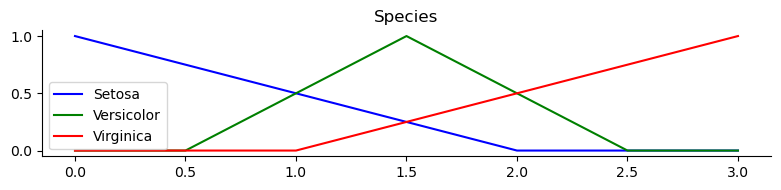

In [20]:
x_species = np.arange(0, 3.1, 0.1)
s_setosa = trigMem(x_species, [0, 0, 2])
s_versi = trigMem(x_species, [0.5, 1.5, 2.5])
s_virgi = trigMem(x_species, [1, 3, 3])

# visualize these universes and membership functions
fig, (ax0) = plt.subplots(nrows=1, figsize=(8, 2))

ax0.plot(x_species, s_setosa, 'b', linewidth=1.5, label='Setosa')
ax0.plot(x_species, s_versi, 'g', linewidth=1.5, label='Versicolor')
ax0.plot(x_species, s_virgi, 'r', linewidth=1.5, label='Virginica')
ax0.set_title('Species')
ax0.legend()


# turn off top/right axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()

In [21]:
ind = [6.3, 2.7, 4.9, 1.8]

sl_level_lo = interpMem(x_sl, sl_lo, ind[0])
sl_level_md = interpMem(x_sl, sl_md, ind[0])
sl_level_hi = interpMem(x_sl, sl_hi, ind[0])

sw_level_lo = interpMem(x_sw, sw_lo, ind[1])
sw_level_md = interpMem(x_sw, sw_md, ind[1])
sw_level_hi = interpMem(x_sw, sw_hi, ind[1])

pl_level_lo = interpMem(x_pl, pl_lo, ind[2])
pl_level_md = interpMem(x_pl, pl_md, ind[2])
pl_level_hi = interpMem(x_pl, pl_hi, ind[2])

pw_level_lo = interpMem(x_pw, pw_lo, ind[3])
pw_level_md = interpMem(x_pw, pw_md, ind[3])
pw_level_hi = interpMem(x_pw, pw_hi, ind[3])


In [22]:
# 0 - Lukasiewicz
# 1 - Correlation Min
# 2 - Correlation Product
impOp = 2

# 0 - Maximum
# 1 - Sum
aggOp = 0

## Rules
- IF petal length is small THEN setosa
- IF sepal width is small THEN versicolor
- IF petal width is big THEN virginica

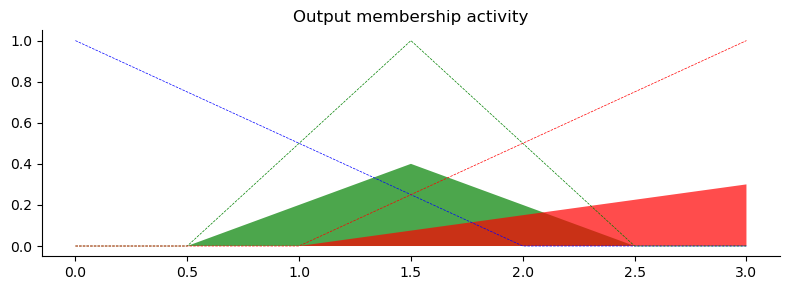

In [23]:
rules = []

# if petal length and petal width is small then setosa
tempRule = implication(pl_level_lo, pw_level_lo, impOp)
rules.append(implication(tempRule, s_setosa, impOp))

# if petal length is medium then versicolor
rules.append(implication(pl_level_md, s_versi, impOp))

# if sepal width is small then versicolor
# rules.append(implication(sw_level_lo, s_versi, impOp)) - bad rule

# if petal length is big then virginica
rules.append(implication(pl_level_hi, s_virgi, impOp))

# if sepal length is big then virginica
# rules.append(implication(sl_level_hi, s_virgi, impOp)) - bad rule

aggregated = aggregate(rules, aggOp)


species0 = np.zeros_like(x_species)

# visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_species, species0, rules[0], facecolor='b', alpha=0.7)
ax0.plot(x_species, s_setosa, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_species, species0, rules[1], facecolor='g', alpha=0.7)
ax0.plot(x_species, s_versi, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_species, species0, rules[2], facecolor='r', alpha=0.7)
ax0.plot(x_species, s_virgi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# turn off top/right axes
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.get_xaxis().tick_bottom()
ax0.get_yaxis().tick_left()

plt.tight_layout()

l. versicolor
1.885654008438819


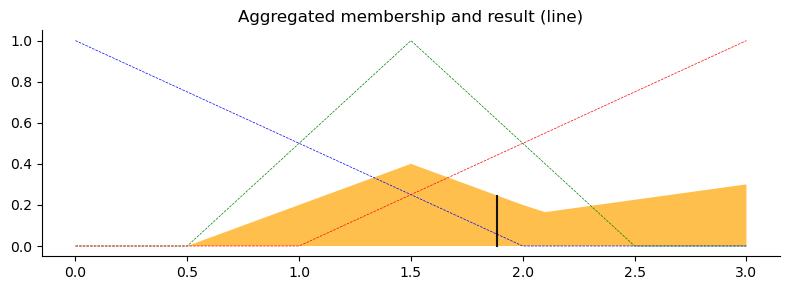

In [24]:
# aggregated = rule1 + rule2 + rule3

species = centroidDF(x_species, aggregated)
species_activation = interpMem(x_species, aggregated, species)

if species < 1:
    print("l. setosa")
elif species < 2:
    print("l. versicolor")
elif species < 3:
    print("l. virginica")

print(species)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_species, s_setosa, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_species, s_versi, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_species, s_virgi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_species, species0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([species, species], [0, species_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
